In [15]:
def pois_pos_degrees(D, N):
  import numpy as np
  np.random.seed(0)

  'Draw N degrees from a Poissonian sequence with lambda = D and length L'
  def remove_zeros(array):
    print("array", array, "degarray", np.sum(array))
    its = 0
    while True:
      its += 1
      mask = np.where(array == 0)
      if not mask[0].size: 
        print(f"Replacing non-0 degrees in {its} iterations")
        return array
      
      'the sum of the degrees must be even'
      psum = np.sum(array)
      print("psum", psum)
      if not psum % 2: #psum is even return even cover
        while True:
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          print("even cover?", cover)
          if not np.sum(cover) % 2: break
      else:
        while True: #psum is odd return odd cover
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          if np.sum(cover) % 2: break
      print("cover final", cover)
      array[mask] = cover

  pos_degrees = np.random.poisson(lam = D, size = N)
  pos_degrees = remove_zeros(pos_degrees)
  print(pos_degrees)
  return pos_degrees

D, N = 2, 10
degrees = pois_pos_degrees(D, N)

print('N',N)


array [3 2 5 1 0 0 7 1 3 3] degarray 25
psum 25
cover final [5 2]
Replacing non-0 degrees in 3 iterations
[3 2 5 1 5 2 7 1 3 3]
N 10


In [2]:
print(f'almeno uno a comp science: {sum([(1/x) for x in range(34,45)])}',)
print(f'almeno uno a economics science: {sum([(1/x) for x in range(44,55)])}',)


almeno uno a comp science: 0.28392766758954946
almeno uno a economics science: 0.22543177314244237


In [16]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np

def dic_nodes_degrees(degrees):
    np.random.seed(1)
    print("degrees", degrees, sum(degrees))
    nodes = np.arange(N)
    dic_nodes = nodes.copy()
    np.random.shuffle(dic_nodes)
    dic_nodes = {k:v for k in dic_nodes for v in np.sort(degrees)[np.where(dic_nodes == k)]}
    sorted_nodes = np.array([x for x in dic_nodes.keys()])
    print(f'nodes: {nodes}, sorted_nodes: {sorted_nodes}', "dic_nodes", dic_nodes, np.sort(degrees))
    return dic_nodes

dic_nodes = dic_nodes_degrees(degrees)

from copy import deepcopy
'This is a part only to check the final graph'
check_nodes = [[],[],[]]
check_ls = [np.arange(len(dic_nodes)), np.array([x for x in dic_nodes.keys()]), dic_nodes]
i = 0
for x in check_ls:
    check_nodes[i] = deepcopy(x)
    i += 1
#check_nodes[2] = deepcopy()
print(f'check_nodes: {check_nodes}')

degrees [3 2 5 1 5 2 7 1 3 3] 32
nodes: [0 1 2 3 4 5 6 7 8 9], sorted_nodes: [2 9 6 4 0 3 1 7 8 5] dic_nodes {2: 1, 9: 1, 6: 2, 4: 2, 0: 3, 3: 3, 1: 3, 7: 5, 8: 5, 5: 7} [1 1 2 2 3 3 3 5 5 7]
check_nodes: [array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5]), {2: 1, 9: 1, 6: 2, 4: 2, 0: 3, 3: 3, 1: 3, 7: 5, 8: 5, 5: 7}]


array [3 2 5 1 0 0 7 1 3 3 5 2 2 0 1 3 1 2 1 0 1 1 1 1 5 1 1 1 0 2 1 3 0 2 1 1 2
 3 1 4] degarray 74
psum 74
even cover? [5 4 1 2 2 2]
cover final [5 4 1 2 2 2]
Replacing non-0 degrees in 3 iterations
[3 2 5 1 5 4 7 1 3 3 5 2 2 1 1 3 1 2 1 2 1 1 1 1 5 1 1 1 2 2 1 3 2 2 1 1 2
 3 1 4]
N 40
degrees [3 2 5 1 5 4 7 1 3 3 5 2 2 1 1 3 1 2 1 2 1 1 1 1 5 1 1 1 2 2 1 3 2 2 1 1 2
 3 1 4] 90
nodes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39], sorted_nodes: [ 2 31  3 21 27 29 22 39 19 26 32 17 30 36 33 28  4 14 10 35 23 24 34 20
 18 25  6 13  7 38  1 16  0 15  5 11  9  8 12 37] dic_nodes {2: 1, 31: 1, 3: 1, 21: 1, 27: 1, 29: 1, 22: 1, 39: 1, 19: 1, 26: 1, 32: 1, 17: 1, 30: 1, 36: 1, 33: 1, 28: 1, 4: 1, 14: 2, 10: 2, 35: 2, 23: 2, 24: 2, 34: 2, 20: 2, 18: 2, 25: 2, 6: 2, 13: 3, 7: 3, 38: 3, 1: 3, 16: 3, 0: 3, 15: 4, 5: 4, 11: 5, 9: 5, 8: 5, 12: 5, 37: 7} [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 4

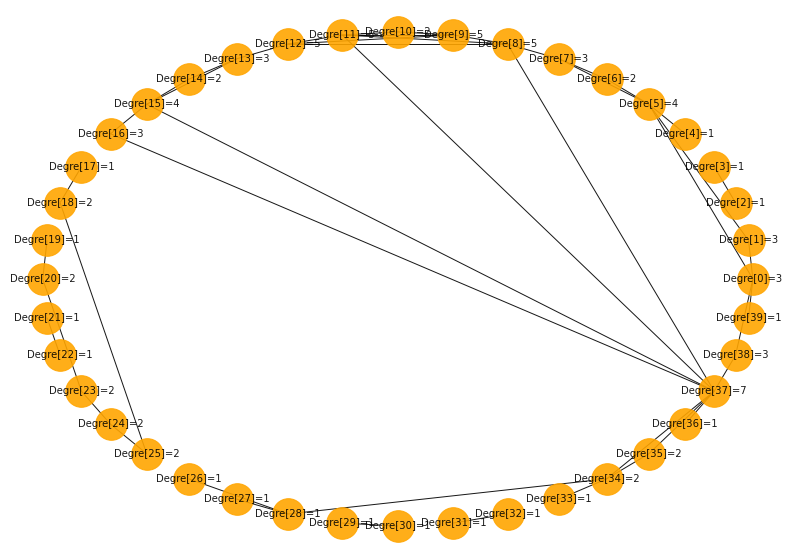

In [9]:
#right definitionsss!!! Net is built!

def pois_pos_degrees(D, N):
  import numpy as np
  np.random.seed(0)

  'Draw N degrees from a Poissonian sequence with lambda = D and length L'
  def remove_zeros(array):
    print("array", array, "degarray", np.sum(array))
    its = 0
    while True:
      its += 1
      mask = np.where(array == 0)
      if not mask[0].size: 
        print(f"Replacing non-0 degrees in {its} iterations")
        return array
      
      'the sum of the degrees must be even'
      psum = np.sum(array)
      print("psum", psum)
      if not psum % 2: #psum is even return even cover
        while True:
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          print("even cover?", cover)
          if not np.sum(cover) % 2: break
      else:
        while True: #psum is odd return odd cover
          its += 1
          cover = np.random.poisson(lam = D, size = len(array[mask]))
          if np.sum(cover) % 2: break
      print("cover final", cover)
      array[mask] = cover

  pos_degrees = np.random.poisson(lam = D, size = N)
  pos_degrees = remove_zeros(pos_degrees)
  print(pos_degrees)
  return pos_degrees


def dic_nodes_degrees(degrees):
    np.random.seed(1)
    print("degrees", degrees, sum(degrees))
    nodes = np.arange(N)
    dic_nodes = nodes.copy()
    np.random.shuffle(dic_nodes)
    dic_nodes = {k:v for k in dic_nodes for v in np.sort(degrees)[np.where(dic_nodes == k)]}
    sorted_nodes = np.array([x for x in dic_nodes.keys()])
    print(f'nodes: {nodes}, sorted_nodes: {sorted_nodes}', "dic_nodes", dic_nodes, np.sort(degrees))
    return dic_nodes

def delete_node_from_both(avl_node, nodes, sorted_nodes, b_bool):
    nodes = np.delete(nodes, np.where(nodes == avl_node))
    sorted_nodes = np.delete(sorted_nodes, np.where(sorted_nodes == avl_node))
    print(f'len(nodes): {len(nodes)}',)
    if len(nodes) == 1: 
        print(f'\nEnd By len(nodes):{len(nodes)},{len(sorted_nodes)}')
        b_bool = True
    return nodes, sorted_nodes, b_bool

def add_edge(snode, i, b_bool, edges, sorted_nodes, nodes, dic_nodes):
    D = len(nodes)
    snode_idx = np.where(nodes == snode)[0]
    avl_node = nodes[(snode_idx+i)%D] #nearest available node
    #print(f'Inside i={i} with D = {D} add_edge: nodes: {nodes}, snode_idx[{snode}]:{snode_idx},' )   
    #print(f"Before edge.add: selected node: {avl_node}, deg[{avl_node}]: {dic_nodes[int(avl_node)]}")
    edges.add((int(snode),int(avl_node)))
    dic_nodes[int(avl_node)] -= 1
    #print(f'after edge.add: edges, dic_nodes[{avl_node}]', edges, dic_nodes[int(avl_node)])
    if dic_nodes[int(avl_node)]==1:
        nodes, sorted_nodes, b_bool = delete_node_from_both(avl_node,  nodes, sorted_nodes, b_bool)
        #print(f'Deleted for low degree {avl_node}: nodes, sorted_nodes', nodes, sorted_nodes)

def edges_nearest_node(dc_dic_nodes):
    from copy import deepcopy
    dc_dic_nodes = deepcopy(dic_nodes)
    sorted_nodes = np.array([x for x in dc_dic_nodes.keys()])
    nodes = np.arange(len(sorted_nodes))
    #print(f'nodes: {nodes}',f'sorted_nodes: {sorted_nodes}',)
    #print(f'id(nodes): {id(nodes)}',f"id(dc_dic_nodes.keys)", id(dic_nodes.keys()), np.array(dic_nodes.keys()))
    edges = set()
    b_bool = False #breakingbool
    for snode in sorted_nodes:
        #print(f'\nRecap nodes: nodes: {nodes}, sorted_nodes & degree', sorted_nodes, [dc_dic_nodes[k] for k in sorted_nodes])
        #print(f'Choosen snode: {snode} with degree: {dc_dic_nodes[snode]}')
        snode_idx = np.where(nodes == snode)[0]
        for i in np.arange(1, dc_dic_nodes[snode]//2+1):
            no_avl_nodes = [a for (a,b) in edges if b == snode]
            #print(f'check already takes edges & avl_nodes: {edges}, {no_avl_nodes}', )
            #if nodes[(snode_idx+i)%D] not in no_avl_nodes:
            add_edge(snode, i, b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                #print(f'i bbool break: ',)
                break
            add_edge(snode, -i, b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                #print(f'-i bbool break: ',)
                break

        if dc_dic_nodes[snode]%2: #and nodes[(snode_idx+1)%D] not in [b for (a,b) in edges if a == snode]:
            #print("Odd last attachment")
            add_edge(snode = snode, i = 1, b_bool = b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                #print(f'Odd last bbool break: ',)
                break
        nodes, sorted_nodes, b_bool = delete_node_from_both(snode, nodes = nodes, sorted_nodes = sorted_nodes, b_bool = b_bool)
        #print(f'End of 1 cycle deleted snode: {snode}')
        
        if b_bool: 
            #print(f'End of all',)
            break
        #print('After all the rewiring, left nodes', nodes, "sorted_nodes", sorted_nodes, "edges", edges)
    return edges

def NN_pois_net(N, D, dic_nodes, ext_D, folder = "bleah", p = 0, conn_flag = False):
    from definitions import check_loops_parallel_edges, infos_sorted_nodes, \
        long_range_edge_add, connect_net, N_D_std_D

    edges = edges_nearest_node(dic_nodes)
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    G.add_edges_from(edges)

    check_loops_parallel_edges(G)
    infos_sorted_nodes(G, num_sorted_nodes=False)

    long_range_edge_add(G, p = p)
    connect_net(G, conn_flag = conn_flag)

    #print(f"There are {len([j for i,j in G.degree() if j == 0])} 0 degree node as")
    _,D,_ = N_D_std_D(G)
    #print(f"End of wiring with average degree {D} vs {ext_D}")
    #print(f'G.is_connected(): {nx.is_connected(G)}',)
    
    return G

import networkx as nx
import matplotlib.pylab as plt
import numpy as np

D, N = 2, 40
degrees = pois_pos_degrees(D, N)
print('N',N)
dic_nodes = dic_nodes_degrees(degrees)
G = NN_pois_net(N,D,dic_nodes,1)
fig, ax = plt.subplots(figsize = (14,10))
labels = {k:f"Degre[{k}]={v}" for k,v in dic_nodes.items()}

print(f'labels: {labels}',)


nx.draw_circular(G, ax = ax, with_labels = True, labels = labels, width = 1, node_size = 1e3, alpha = 0.9, node_color = "orange", font_size = 10)
plt.show()

#print(f'dic_nodes: {dic_nodes}',)



nodes: [0 1 2 3 4 5 6 7 8 9] sorted_nodes: [2 9 6 4 0 3 1 7 8 5]
id(nodes): 140292787812272 id(dc_dic_nodes.keys) 140292785320624 dict_keys([2, 9, 6, 4, 0, 3, 1, 7, 8, 5])

Recap nodes: nodes: [0 1 2 3 4 5 6 7 8 9], sorted_nodes & degree [2 9 6 4 0 3 1 7 8 5] [1, 1, 2, 2, 3, 3, 3, 5, 5, 7]
Choosen snode: 2 with degree: 1
Odd last attachment
Inside i=1 with D = 10 add_edge: nodes: [0 1 2 3 4 5 6 7 8 9], snode_idx[2]:[2],
Before edge.add: selected node: [3], deg[[3]]: 3
after edge.add: edges, dic_nodes[[3]] {(2, 3)} 2
len(nodes): 9
End of 1 cycle deleted snode: 2
After all the rewiring, left nodes [0 1 3 4 5 6 7 8 9] sorted_nodes [9 6 4 0 3 1 7 8 5] edges {(2, 3)}

Recap nodes: nodes: [0 1 3 4 5 6 7 8 9], sorted_nodes & degree [9 6 4 0 3 1 7 8 5] [1, 2, 2, 3, 2, 3, 5, 5, 7]
Choosen snode: 9 with degree: 1
Odd last attachment
Inside i=1 with D = 9 add_edge: nodes: [0 1 3 4 5 6 7 8 9], snode_idx[9]:[8],
Before edge.add: selected node: [0], deg[[0]]: 3
after edge.add: edges, dic_nodes[[0]] 

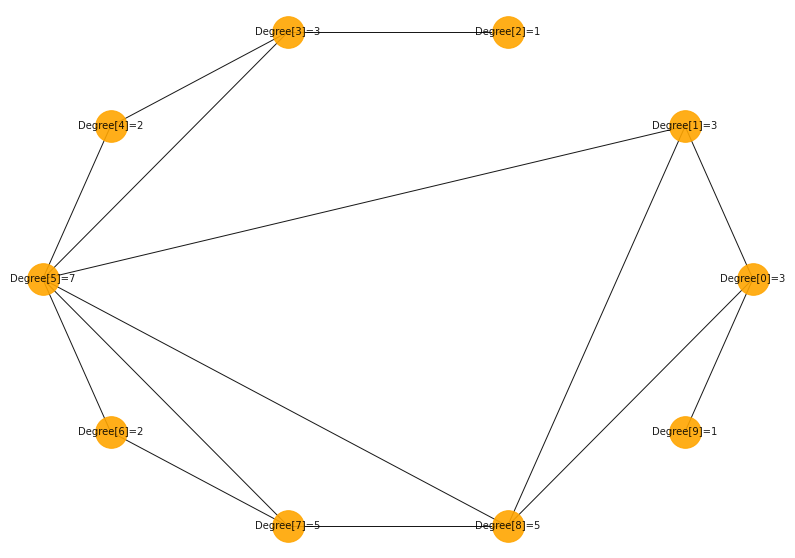

dic_nodes: {2: 1, 9: 1, 6: 2, 4: 2, 0: 3, 3: 3, 1: 3, 7: 5, 8: 5, 5: 7}


In [23]:
def delete_node_from_both(avl_node, nodes, sorted_nodes, b_bool):
    nodes = np.delete(nodes, np.where(nodes == avl_node))
    sorted_nodes = np.delete(sorted_nodes, np.where(sorted_nodes == avl_node))
    print(f'len(nodes): {len(nodes)}',)
    if len(nodes) == 1: 
        print(f'\nEnd By len(nodes):{len(nodes)},{len(sorted_nodes)}')
        b_bool = True
    return nodes, sorted_nodes, b_bool

def add_edge(snode, i, b_bool, edges, sorted_nodes, nodes, dic_nodes):
    D = len(nodes)
    snode_idx = np.where(nodes == snode)[0]
    avl_node = nodes[(snode_idx+i)%D] #nearest available node
    print(f'Inside i={i} with D = {D} add_edge: nodes: {nodes}, snode_idx[{snode}]:{snode_idx},' )   
    print(f"Before edge.add: selected node: {avl_node}, deg[{avl_node}]: {dic_nodes[int(avl_node)]}")
    edges.add((int(snode),int(avl_node)))
    dic_nodes[int(avl_node)] -= 1
    print(f'after edge.add: edges, dic_nodes[{avl_node}]', edges, dic_nodes[int(avl_node)])
    if dic_nodes[int(avl_node)]==1:
        nodes, sorted_nodes, b_bool = delete_node_from_both(avl_node,  nodes, sorted_nodes, b_bool)
        print(f'Deleted for low degree {avl_node}: nodes, sorted_nodes', nodes, sorted_nodes)
       

def edges_nearest_node(dc_dic_nodes):
    from copy import deepcopy
    dc_dic_nodes = deepcopy(dic_nodes)
    sorted_nodes = np.array([x for x in dc_dic_nodes.keys()])
    nodes = np.arange(len(sorted_nodes))
    print(f'nodes: {nodes}',f'sorted_nodes: {sorted_nodes}',
    )
    
    print(f'id(nodes): {id(nodes)}',f"id(dc_dic_nodes.keys)", id(dic_nodes.keys()), np.array(dic_nodes.keys()))
    edges = set()
    b_bool = False #breakingbool
    for snode in sorted_nodes:
        print(f'\nRecap nodes: nodes: {nodes}, sorted_nodes & degree', sorted_nodes, [dc_dic_nodes[k] for k in sorted_nodes])
        print(f'Choosen snode: {snode} with degree: {dc_dic_nodes[snode]}')
        snode_idx = np.where(nodes == snode)[0]
        for i in np.arange(1, dc_dic_nodes[snode]//2+1):
            no_avl_nodes = [a for (a,b) in edges if b == snode]
            print(f'check already takes edges & avl_nodes: {edges}, {no_avl_nodes}', )
            #if nodes[(snode_idx+i)%D] not in no_avl_nodes:
            add_edge(snode, i, b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                print(f'i bbool break: ',)
                break
            add_edge(snode, -i, b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                print(f'-i bbool break: ',)
                break

        if dc_dic_nodes[snode]%2: #and nodes[(snode_idx+1)%D] not in [b for (a,b) in edges if a == snode]:
            print("Odd last attachment")
            add_edge(snode = snode, i = 1, b_bool = b_bool, edges = edges, sorted_nodes = sorted_nodes, \
                nodes = nodes, dic_nodes = dc_dic_nodes)
            if b_bool: 
                print(f'Odd last bbool break: ',)
                break
        nodes, sorted_nodes, b_bool = delete_node_from_both(snode, nodes = nodes, sorted_nodes = sorted_nodes, b_bool = b_bool)
        print(f'End of 1 cycle deleted snode: {snode}')
        
        if b_bool: 
            print(f'End of all',)
            break
        print('After all the rewiring, left nodes', nodes, "sorted_nodes", sorted_nodes, "edges", edges)
    return edges

def NN_pois_net(N, D, dic_nodes, ext_D, folder = "bleah", p = 0, conn_flag = False):
    from definitions import check_loops_parallel_edges, infos_sorted_nodes, \
        long_range_edge_add, connect_net, N_D_std_D
    edges = edges_nearest_node(dic_nodes)
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    G.add_edges_from(edges)

    check_loops_parallel_edges(G)
    infos_sorted_nodes(G, num_sorted_nodes=False)

    long_range_edge_add(G, p = p)
    connect_net(G, conn_flag = conn_flag)

    print(f"There are {len([j for i,j in G.degree() if j == 0])} 0 degree node as")
    _,D,_ = N_D_std_D(G)
    print(f"End of wiring with average degree {D} vs {ext_D}")
    print(f'G.is_connected(): {nx.is_connected(G)}',)
    
    return G


G = NN_pois_net(N,D,dic_nodes,1)
fig, ax = plt.subplots(figsize = (14,10))
labels = {k:f"Degree[{k}]={v}" for k,v in check_nodes[2].items()}

nx.draw_circular(G, ax = ax, with_labels = True, labels = labels, width = 1, node_size = 1e3, alpha = 0.9, node_color = "orange", font_size = 10)
plt.show()

print(f'dic_nodes: {dic_nodes}',)



check_nodes: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 9, 6, 4, 0, 3, 1, 7, 8, 5], {2: 1, 9: 1, 6: 2, 4: 2, 0: 3, 3: 3, 1: 3, 7: 5, 8: 5, 5: 7}]


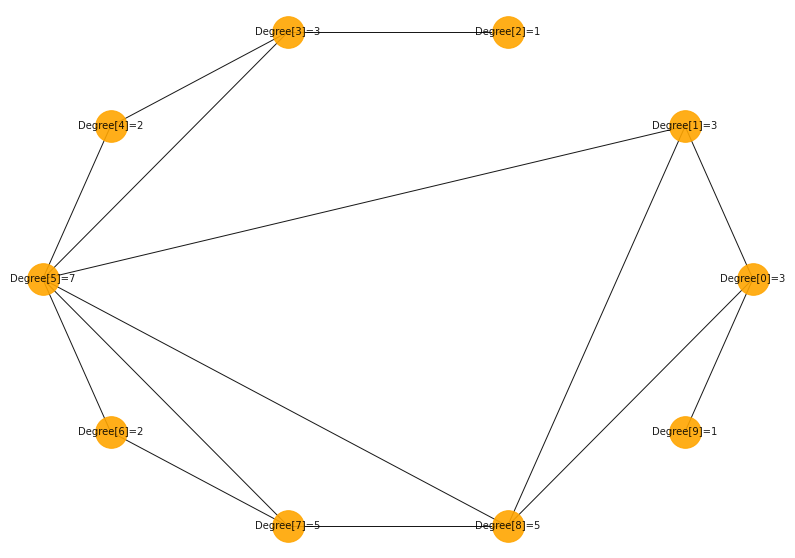

In [13]:
print(f'check_nodes: {check_nodes}',)

G = nx.Graph()
G.add_nodes_from(np.arange(N))
G.add_edges_from(edges)

fig, ax = plt.subplots(figsize = (14,10))
labels = {k:f"Degree[{k}]={v}" for k,v in check_nodes[2].items()}

#labels = nx.draw_networkx_labels(G,pos=nx.draw_circular(G), font_size = 40)
#pos = nx.nx_pydot.graphviz_layout(G, prog = "neato" )
nx.draw_circular(G, ax = ax, with_labels = True, labels = labels, width = 1, node_size = 1e3, alpha = 0.9, node_color = "orange", font_size = 10)
#plt.subplots_adjust(left = 0, right = 1.2)
plt.show()

In [5]:
ls = [(1,2),(3,4)]

remnant = [j for (i,j) in ls if i == 1]
print(f'remnant: {remnant}',)

def return_f(x,y):
    print(f'x*y: {x*y}',)
    if x*y > 4:
        return

for x in [1,2,3]:
    for y in [2,3,4]:
        break_f(x,y)

    print(f'x: {x}',)
    if x == 2:
        print(f'break',)
        break
        

remnant: [2]


NameError: name 'break_f' is not defined

In [ ]:
def remove_loops_parallel_edges(remove_loops = True):
  print("\n")
  import networkx as nx

  G = nx.complete_graph(10)

  'create a list of what we want to remove'
  full_ls = list(G.edges())
  print(f'full_ls: {full_ls}')
  
  lpe = []
  for i in full_ls:
    full_ls.remove(i)
    #print(f'full_ls: {full_ls}')
    
    for j in full_ls:
      if i == j: lpe.append(j) #print("i", i, "index", full_ls.index(i), "j", j)
  return lpe

remove_loops_parallel_edges()




full_ls: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


[]